## Model Training

In [1]:
## Basic imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Preprocessing imports

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Pipeline

from sklearn.pipeline import Pipeline

## Train test split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Modelling 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

## Other imports

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## Metrics evaluation

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

### Import the csv data as pandas dataframe

In [2]:
df = pd.read_csv("./data/cleaned_data.csv")

In [3]:
df.head()

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,OH,1000,1406.91,0,466132,MALE,MD,husband,53300,0,...,YES,1,2,YES,71610,6510,52080,Saab,2004,Y
1,IN,2000,1197.22,5000000,468176,MALE,MD,other-relative,0,0,...,?,0,0,?,5070,780,3510,Mercedes,2007,Y
2,OH,2000,1413.14,5000000,430632,FEMALE,PhD,own-child,35100,0,...,NO,2,3,NO,34650,7700,23100,Dodge,2007,N
3,IL,2000,1415.74,6000000,608117,FEMALE,PhD,unmarried,48900,-62400,...,?,1,2,NO,63400,6340,50720,Chevrolet,2014,Y
4,IL,1000,1583.91,6000000,610706,MALE,Associate,unmarried,66000,-46000,...,NO,0,1,NO,6500,1300,4550,Accura,2009,N


In [4]:
## Check for null values

df.isnull().sum()

policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
vehicle_claim                  0
auto_make                      0
auto_year                      0
fraud_reported                 0
dtype: int64

In [5]:
## Define dependent and independent features

X = df.drop(columns=['fraud_reported'], axis=1)

y = df['fraud_reported']

In [6]:
X

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_year
0,OH,1000,1406.91,0,466132,MALE,MD,husband,53300,0,...,1,YES,1,2,YES,71610,6510,52080,Saab,2004
1,IN,2000,1197.22,5000000,468176,MALE,MD,other-relative,0,0,...,1,?,0,0,?,5070,780,3510,Mercedes,2007
2,OH,2000,1413.14,5000000,430632,FEMALE,PhD,own-child,35100,0,...,3,NO,2,3,NO,34650,7700,23100,Dodge,2007
3,IL,2000,1415.74,6000000,608117,FEMALE,PhD,unmarried,48900,-62400,...,1,?,1,2,NO,63400,6340,50720,Chevrolet,2014
4,IL,1000,1583.91,6000000,610706,MALE,Associate,unmarried,66000,-46000,...,1,NO,0,1,NO,6500,1300,4550,Accura,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,1000,1310.80,0,431289,FEMALE,Masters,unmarried,0,0,...,1,YES,0,1,?,87200,17440,61040,Honda,2006
996,IL,1000,1436.79,0,608177,FEMALE,PhD,wife,70900,0,...,1,YES,2,3,?,108480,18080,72320,Volkswagen,2015
997,OH,500,1383.49,3000000,442797,FEMALE,Masters,other-relative,35100,0,...,3,?,2,3,YES,67500,7500,52500,Suburu,1996
998,IL,2000,1356.92,5000000,441714,MALE,Associate,wife,0,0,...,1,?,0,1,YES,46980,5220,36540,Audi,1998


In [7]:
y

0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object

In [8]:
numerical_features = X.select_dtypes(exclude="object").columns

numerical_features

Index(['policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'vehicle_claim', 'auto_year'],
      dtype='object')

In [9]:
categorical_features = X.select_dtypes(include="object").columns

categorical_features

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'property_damage', 'police_report_available',
       'auto_make'],
      dtype='object')

In [10]:
X['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [11]:
X['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [12]:
X['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("Shape of Training data : ", X_train.shape, y_train.shape)

print("-----------------------------------------------------")

print("Shape of testing data : ", X_test.shape, y_test.shape)

Shape of Training data :  (800, 27) (800,)
-----------------------------------------------------
Shape of testing data :  (200, 27) (200,)


In [15]:
## Applying label encoder on target class

le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [16]:
le.classes_

array(['N', 'Y'], dtype=object)

In [17]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [18]:
y_train

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0])

In [20]:
transformer = ColumnTransformer(transformers=[
    ("OrdinalEncoder", OrdinalEncoder(), categorical_features),
    ("StandardScaler", StandardScaler(), numerical_features)
], remainder="drop")

In [21]:
X_train = transformer.fit_transform(X_train)

In [22]:
X_test = transformer.transform(X_test)

In [23]:
X_train.shape, X_test.shape

((800, 27), (200, 27))

In [24]:
X_train

array([[ 0.        ,  0.        ,  6.        , ...,  1.33592487,
         1.32765371,  1.00849147],
       [ 2.        ,  0.        ,  1.        , ..., -0.19926161,
         0.05344995,  0.00771432],
       [ 2.        ,  0.        ,  5.        , ..., -1.47011135,
        -1.90929871,  0.17451051],
       ...,
       [ 1.        ,  0.        ,  4.        , ...,  0.64458261,
        -0.04415987, -0.99306282],
       [ 2.        ,  1.        ,  4.        , ..., -0.03862621,
         1.07808917, -1.49345139],
       [ 0.        ,  0.        ,  3.        , ..., -1.53111214,
        -0.69049511,  1.34208385]])

In [25]:
X_test

array([[ 0.        ,  0.        ,  6.        , ...,  1.72632991,
         0.9382697 , -0.32587806],
       [ 0.        ,  0.        ,  2.        , ..., -0.45749828,
         0.2085704 ,  0.17451051],
       [ 1.        ,  0.        ,  4.        , ...,  1.21799001,
         0.47660167,  0.3413067 ],
       ...,
       [ 1.        ,  1.        ,  3.        , ..., -0.06099316,
         0.26871915, -0.32587806],
       [ 1.        ,  1.        ,  2.        , ..., -0.18299474,
         1.12821312, -0.32587806],
       [ 2.        ,  0.        ,  3.        , ..., -1.27897555,
        -1.72568674, -0.15908187]])

In [28]:
def fit_classification_models(X, y, test_size=0.2, random_state=42):
    """
    Fit classification models using all the available algorithms in scikit-learn.

    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input data.

    y : array-like of shape (n_samples,)
        The target variable.

    test_size : float, default=0.2
        The proportion of the dataset to include in the test split.

    random_state : int, default=42
        Controls the randomness of the dataset splitting.

    Returns:
    --------
    results : dict
        A dictionary containing the performance metrics for each classification algorithm.
    """
    

    # Create pipelines for all the classifiers
    pipelines = {
        'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())]),
        'Decision Tree': Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
        'Random Forest': Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())]),
        'K-Nearest Neighbors': Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
        'Gaussian Naive Bayes': Pipeline([('scaler', StandardScaler()), ('classifier', GaussianNB())]),
        'Support Vector Machine': Pipeline([('scaler', StandardScaler()), ('classifier', SVC())]),
        'XGBoost': Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())]),
        'ExtraTreesClassifier': Pipeline([('scaler', StandardScaler()), ('classifier', ExtraTreesClassifier())]),
        'CatBoostClassifier': Pipeline([('scaler', StandardScaler()), ('classifier', CatBoostClassifier())]),
        'AdaBoostClassifier': Pipeline([('scaler', StandardScaler()), ('classifier', AdaBoostClassifier())]),
    }

    # Fit and evaluate all the classifiers
    results = {}
    model_list = []
    acc_list = []
    f1_list = []
    p_score = []
    r_score = []
    
    for classifier_name, pipeline in pipelines.items():
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        p_score = precision_score(y_test, y_pred)
        r_score = recall_score(y_test, y_pred)
        results[classifier_name] = {'accuracy': accuracy, 'f1-score': f1, 'precision': p_score, 'recall': r_score}

        model_list.append(results)

    return model_list


In [29]:
fit_classification_models(X_train, y_train)

Learning rate set to 0.009366
0:	learn: 0.6868048	total: 229ms	remaining: 3m 48s
1:	learn: 0.6805186	total: 236ms	remaining: 1m 57s
2:	learn: 0.6745160	total: 242ms	remaining: 1m 20s
3:	learn: 0.6680268	total: 248ms	remaining: 1m 1s
4:	learn: 0.6619147	total: 255ms	remaining: 50.7s
5:	learn: 0.6557734	total: 260ms	remaining: 43.1s
6:	learn: 0.6497945	total: 267ms	remaining: 37.9s
7:	learn: 0.6446194	total: 271ms	remaining: 33.6s
8:	learn: 0.6387031	total: 276ms	remaining: 30.4s
9:	learn: 0.6331397	total: 283ms	remaining: 28s
10:	learn: 0.6279087	total: 289ms	remaining: 25.9s
11:	learn: 0.6229468	total: 294ms	remaining: 24.2s
12:	learn: 0.6180714	total: 300ms	remaining: 22.8s
13:	learn: 0.6131046	total: 305ms	remaining: 21.5s
14:	learn: 0.6080135	total: 311ms	remaining: 20.4s
15:	learn: 0.6030395	total: 316ms	remaining: 19.4s
16:	learn: 0.5980671	total: 322ms	remaining: 18.6s
17:	learn: 0.5934003	total: 328ms	remaining: 17.9s
18:	learn: 0.5888303	total: 333ms	remaining: 17.2s
19:	learn:

[{'Logistic Regression': {'accuracy': 0.715,
   'f1-score': 0.6909985909895588,
   'precision': 0.47058823529411764,
   'recall': 0.2909090909090909},
  'Decision Tree': {'accuracy': 0.73,
   'f1-score': 0.7284246575342468,
   'precision': 0.5094339622641509,
   'recall': 0.4909090909090909},
  'Random Forest': {'accuracy': 0.74,
   'f1-score': 0.724669726046447,
   'precision': 0.5384615384615384,
   'recall': 0.38181818181818183},
  'K-Nearest Neighbors': {'accuracy': 0.675,
   'f1-score': 0.6219593100398054,
   'precision': 0.2727272727272727,
   'recall': 0.10909090909090909},
  'Gaussian Naive Bayes': {'accuracy': 0.735,
   'f1-score': 0.741821440208537,
   'precision': 0.5151515151515151,
   'recall': 0.6181818181818182},
  'Support Vector Machine': {'accuracy': 0.705,
   'f1-score': 0.629382367442069,
   'precision': 0.3333333333333333,
   'recall': 0.07272727272727272},
  'XGBoost': {'accuracy': 0.74,
   'f1-score': 0.7136572359650423,
   'precision': 0.5483870967741935,
   're

In [31]:

# Define a list of algorithms
algorithms = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(),
              SVC(), KNeighborsClassifier(), GaussianNB(), GradientBoostingClassifier(),
              XGBClassifier(), ExtraTreesClassifier()]


# Fit models on the training data
results = []
for algo in algorithms:
    algo.fit(X_train, y_train)

    # Predict on the test data
    y_pred = algo.predict(X_test)

    # Evaluate performance of model
    f1 = f1_score(y_test, y_pred, average='weighted')
    acc = accuracy_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred)
    
    result = {'Algorithm': type(algo).__name__, 'F1-score': f1, 'accuracy': acc, 'p_score': p_score, 'r_score': r_score}
    results.append(result)

# Convert results to a DataFrame and sort by F1-score
results_df = pd.DataFrame(results).sort_values(by='p_score', ascending=False)
print(results_df)

                    Algorithm  F1-score  accuracy   p_score   r_score
7               XGBClassifier  0.713657     0.740  0.548387  0.309091
2      RandomForestClassifier  0.706545     0.735  0.533333  0.290909
6  GradientBoostingClassifier  0.715482     0.735  0.527778  0.345455
5                  GaussianNB  0.741821     0.735  0.515152  0.618182
8        ExtraTreesClassifier  0.684522     0.720  0.481481  0.236364
0          LogisticRegression  0.690999     0.715  0.470588  0.290909
1      DecisionTreeClassifier  0.706501     0.710  0.470588  0.436364
4        KNeighborsClassifier  0.645223     0.695  0.363636  0.145455
3                         SVC  0.609420     0.725  0.000000  0.000000


In [32]:
results_df

,Algorithm,F1-score,accuracy,p_score,r_score
7,XGBClassifier,0.713657,0.740,0.548387,0.309091
2,RandomForestClassifier,0.706545,0.735,0.533333,0.290909
6,GradientBoostingClassifier,0.715482,0.735,0.527778,0.345455
5,GaussianNB,0.741821,0.735,0.515152,0.618182
8,ExtraTreesClassifier,0.684522,0.720,0.481481,0.236364
0,LogisticRegression,0.690999,0.715,0.470588,0.290909
1,DecisionTreeClassifier,0.706501,0.710,0.470588,0.436364
4,KNeighborsClassifier,0.645223,0.695,0.363636,0.145455
3,SVC,0.609420,0.725,0.000000,0.000000


### Using Pycaret

In [40]:
## initialize setup

from pycaret.classification import *

s = setup(df, target='fraud_reported')

In [43]:
## compare all models

best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:42:28
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [44]:
print(best_model)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


In [45]:
best_model.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

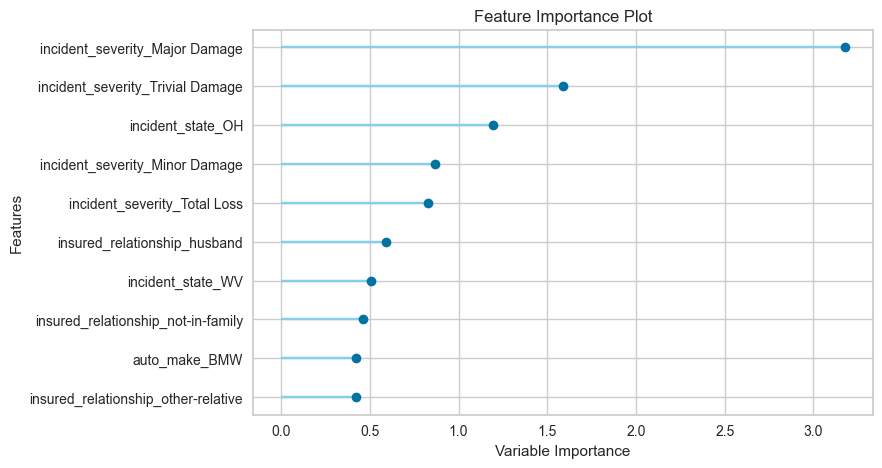

In [47]:
plot_model(best_model, plot="feature")